# Basic Example

After https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Keras_Cheat_Sheet_Python.pdf

In [1]:
import numpy as np

In [2]:
data = np.random.random((1000, 100))

In [3]:
labels = np.random.randint(2, size=(1000, 1))

In [11]:
from conx import Network, Layer, Dataset, one_hot

In [12]:
net = Network("Example")

In [13]:
net.add(Layer("input", shape=100, vshape=(10,10)))
net.add(Layer("hidden", shape=32, vshape=(4, 8), activation="relu"))
net.add(Layer("output", shape=10, activation="sigmoid"))

net.connect("input", "hidden")
net.connect("hidden", "output")

In [14]:
net.compile(optimizer="rmsprop", loss="binary_crossentropy")

In [17]:
ds = Dataset()
ds.load( list(zip(data, [one_hot(x, 10) for x in labels])))
net.set_dataset(ds)

In [18]:
len(net.dataset.targets)

1000

In [19]:
net.train(epochs=2000, accuracy=0.75, batch_size=32, report_rate=25)

Training...
Epoch #   25 | train error 0.12934 | train accuracy 0.92810 | validate% 0.00000
Epoch #   50 | train error 0.11529 | train accuracy 0.94490 | validate% 0.00000
Epoch #   75 | train error 0.09857 | train accuracy 0.95880 | validate% 0.01500
Epoch #  100 | train error 0.08208 | train accuracy 0.97140 | validate% 0.09100
Epoch #  125 | train error 0.06772 | train accuracy 0.97740 | validate% 0.16800
Epoch #  150 | train error 0.05569 | train accuracy 0.98440 | validate% 0.29800
Epoch #  175 | train error 0.04365 | train accuracy 0.99020 | validate% 0.43200
Epoch #  200 | train error 0.03472 | train accuracy 0.99360 | validate% 0.48400
Epoch #  225 | train error 0.02658 | train accuracy 0.99730 | validate% 0.57700
Epoch #  250 | train error 0.02023 | train accuracy 0.99870 | validate% 0.68900
Epoch #  268 | train error 0.01650 | train accuracy 0.99950 | validate% 0.75000


<IPython.core.display.Javascript object>

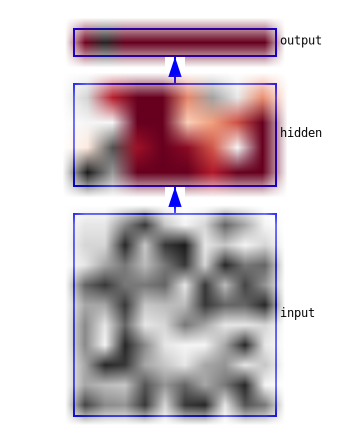

In [20]:
net

In [23]:
for index in range(50):
    net.propagate(net.dataset.inputs[index])